In [11]:
import time
import pyautogui
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.options import Options

print()

yearFiles=input("다운 받고자 하는 파일의 연도를 띄어쓰기를 사용하여 입력하세요.").split()
#options = webdriver.ChromeOptions()
options = Options()
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"
options.add_argument("user_agent=" + user_agent)


# 다운로드 경로 지정
prefs = {"download.default_directory" : "C:/Users/cho/Desktop/plotex"}
options.add_experimental_option("prefs",prefs)


browser = webdriver.Chrome(options=options)
url = "https://jumin.mois.go.kr/ageStatMonth.do#none"
browser.get(url)
time.sleep(2)
elesumbtn = browser.find_element(By.CSS_SELECTOR,'#sum')
elesumbtn.click()
elesAgebtn = browser.find_element(By.CSS_SELECTOR,'#sltArgTypes')
elesAgebtn.send_keys('5')
elesMaxAgebtn = browser.find_element(By.CSS_SELECTOR,'#sltArgTypeB')
elesMaxAgebtn.send_keys('100')



for i,download in enumerate(yearFiles) :
    elem = browser.find_element(By.CSS_SELECTOR,'#searchYearStart')
    elem.send_keys(yearFiles[i])
    time.sleep(1)

    elem = browser.find_element(By.CSS_SELECTOR,'#searchYearEnd')
    elem.send_keys(yearFiles[i])
    time.sleep(1)

    eleSearchbtn= browser.find_element(By.CSS_SELECTOR,'#content_main > div.content > div.tab_content > div > div.section1 > form > fieldset > div.btn_box > input.btn_search')
    eleSearchbtn.click()
    time.sleep(2)

    eleSearchbtn= browser.find_element(By.CSS_SELECTOR,'#xlsxDown')
    eleSearchbtn.click()
    time.sleep(1)
    pyautogui.press("enter")
    time.sleep(2)







['2015', '2016']
{'2016', '2015'}
['2016', '2015']
0 2016


c:\Users\cho\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\cho\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


ValueError: invalid literal for int() with base 10: '2,227,738'

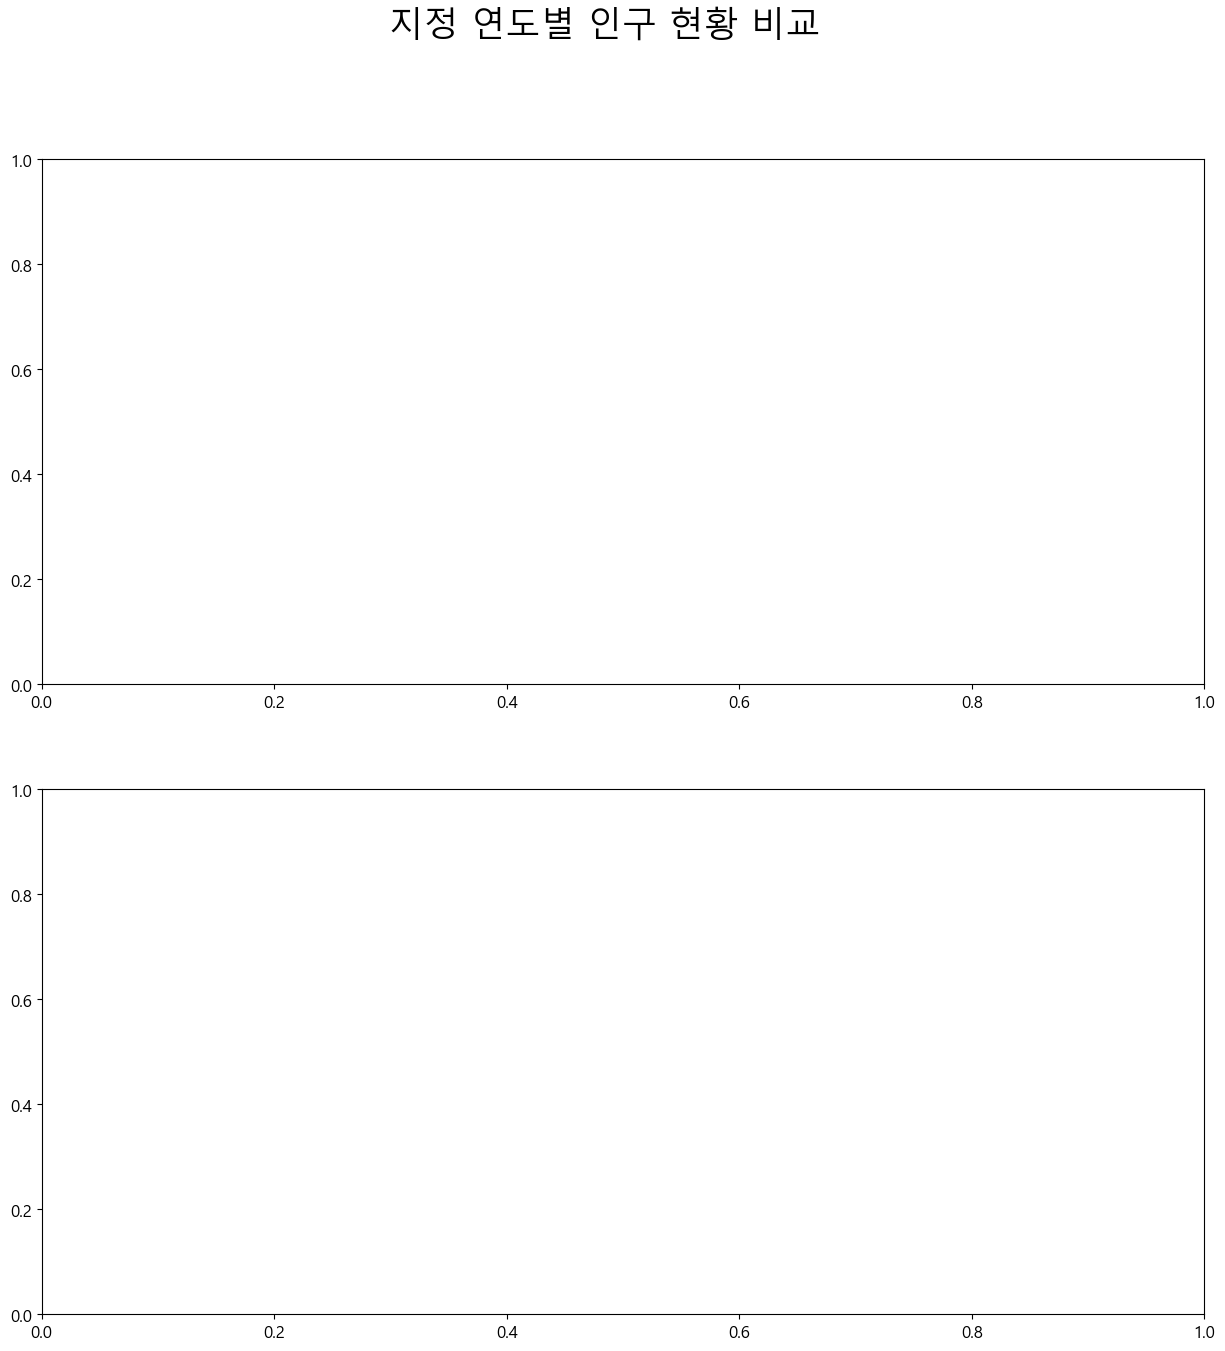

In [12]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.family'] = 'Malgun Gothic' # AppleGothic ==> 맥에서는 맑은 고딕대신 사용
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 12


years=input("비교하고 싶은 년도를 띄어쓰기를 사용하여 입력하세요. ex)2014 2024").split()

print(years)
set_years=set(years)

print(set_years)
years=list(set_years)
print(years)

mulgp,axs=plt.subplots(len(years),1,figsize=(15,15))

for idx,year in enumerate(years) :
    print(idx, year)
    mulgp.suptitle('지정 연도별 인구 현황 비교',size=25)
    file_name = 'C:/Users/cho/Desktop/plotex/'+year+'09_'+year+'09_연령별인구현황_월간.xlsx'
    df_m = pd.read_excel(file_name,skiprows=3,index_col='행정기관',usecols='B,R:AB')
    df_m.iloc[0]=df_m.iloc[0].str.replace(',','').astype(int)

    df_w=pd.read_excel(file_name,skiprows=3,index_col='행정기관',usecols='B,AE:AO')
    df_w.index.values
    
    df_w.iloc[0]=df_w.iloc[0].str.replace(',','').astype(int)
    df_w.iloc[0]
    
    df_m.columns = df_w.columns
 
    axs[idx].barh(df_w.columns,df_w.iloc[0],label='여',color='lightblue')
    axs[idx].barh(df_m.columns,-df_m.iloc[0],label='남',color='coral')
    axs[idx].legend()
    axs[idx].set_title(year+'년 인구 현황',size=20)


    if idx==(len(years)-1) :
        plt.savefig('지정연도 '+years[0]+'~'+years[len(years)-1]+' 인구 현황.png')
        break

 #fig.subplots_adjust(wspace=0.3,hspace=0.5) => 여백설정


       




